In [1]:
import sys
if "../../" not in sys.path:
    sys.path.append("../../")

In [134]:
import pandas as pd
import numpy as np
from importlib import reload
from tqdm import tqdm_notebook as tqdm
import time
import statsmodels.formula.api as smf

import pdaactconn as pc
from trialexplorer import AACTStudySet

import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
dfb = pd.read_pickle('balance_curated.p')
dfo = pd.read_pickle('curated_outcomes.p')                    

In [20]:
used_dfb = dfb[dfb['nct_id'].isin(dfo['om_nct_id'].unique())]
used_dfb.shape

(13568, 20)

In [10]:
dfo[dfo['om_nct_id'].isin(dfb['nct_id'].unique())].shape

(11448, 32)

In [11]:
dfo.shape

(11448, 32)

## for the balance dataset, calculate the balance metrics

In [31]:
num_gender_rows = used_dfb.groupby('nct_id')['is_male'].size()
with_4_g_rows = num_gender_rows[num_gender_rows == 4].index

In [185]:
used_dfb[used_dfb['nct_id'] == 'NCT00557362']

,nct_id,result_group_id,id,ctgov_group_code,classification,category,title,description,units,param_type,param_value,param_value_num,dispersion_type,dispersion_value,dispersion_value_num,dispersion_lower_limit,dispersion_upper_limit,explanation_of_na,is_male,title_rg
38589,NCT00557362,2901092,3170881,B4,,Male,"Sex: Female, Male",,Participants,Count of Participants,19,19.0,,None,NaN,NaN,NaN,,True,Topical Natamycin Without Corneal De-epithelia...
38590,NCT00557362,2901092,3170886,B4,,Female,"Sex: Female, Male",,Participants,Count of Participants,11,11.0,,None,NaN,NaN,NaN,,False,Topical Natamycin Without Corneal De-epithelia...
38591,NCT00557362,2901093,3170882,B3,,Male,"Sex: Female, Male",,Participants,Count of Participants,23,23.0,,None,NaN,NaN,NaN,,True,Topical Natamycin With Corneal De-epithelializ...
38592,NCT00557362,2901093,3170887,B3,,Female,"Sex: Female, Male",,Participants,Count of Participants,7,7.0,,None,NaN,NaN,NaN,,False,Topical Natamycin With Corneal De-epithelializ...
38593,NCT00557362,2901094,3170883,B2,,Male,"Sex: Female, Male",,Participants,Count of Participants,21,21.0,,None,NaN,NaN,NaN,,True,Topical Voriconazole Without Corneal De-epithe...
38594,NCT00557362,2901094,3170888,B2,,Female,"Sex: Female, Male",,Participants,Count of Participants,9,9.0,,None,NaN,NaN,NaN,,False,Topical Voriconazole Without Corneal De-epithe...
38595,NCT00557362,2901095,3170884,B1,,Male,"Sex: Female, Male",,Participants,Count of Participants,16,16.0,,None,NaN,NaN,NaN,,True,Topical Voriconazole With Corneal De-epithelia...
38596,NCT00557362,2901095,3170889,B1,,Female,"Sex: Female, Male",,Participants,Count of Participants,14,14.0,,None,NaN,NaN,NaN,,False,Topical Voriconazole With Corneal De-epithelia...


In [183]:
num_gender_rows[num_gender_rows != 4].index

Index(['NCT00167388', 'NCT00182091', 'NCT00262080', 'NCT00276016',
       'NCT00284089', 'NCT00289289', 'NCT00472056', 'NCT00535587',
       'NCT00557362', 'NCT00633880', 'NCT00634920', 'NCT00670111',
       'NCT00738062', 'NCT00782340', 'NCT00785629', 'NCT00916149',
       'NCT01005888', 'NCT01084135', 'NCT01087502', 'NCT01109602',
       'NCT01118988', 'NCT01126541', 'NCT01134887', 'NCT01194245',
       'NCT01203878', 'NCT01239121', 'NCT01242085', 'NCT01276223',
       'NCT01305200', 'NCT01399697', 'NCT01415440', 'NCT01447849',
       'NCT01541826', 'NCT01551355', 'NCT01565343', 'NCT01578031',
       'NCT01610557', 'NCT01617083', 'NCT01672294', 'NCT01753115',
       'NCT01927055', 'NCT02006576', 'NCT02105285', 'NCT02253160',
       'NCT02275611', 'NCT02305238', 'NCT02405962', 'NCT02413333',
       'NCT02596451', 'NCT02617888', 'NCT02708745', 'NCT02815293',
       'NCT02815982', 'NCT02919267', 'NCT03118934', 'NCT03152136',
       'NCT03230864'],
      dtype='object', name='nct_id')

In [35]:
used_dfb.shape

(13568, 20)

In [34]:
used_dfb_final = used_dfb[used_dfb['nct_id'].isin(with_4_g_rows)]
used_dfb_final.shape

(13160, 20)

In [46]:
used_dfb_final.head()

,nct_id,result_group_id,id,ctgov_group_code,classification,category,title,description,units,param_type,param_value,param_value_num,dispersion_type,dispersion_value,dispersion_value_num,dispersion_lower_limit,dispersion_upper_limit,explanation_of_na,is_male,title_rg
119,NCT00114127,3065103,3336669,B2,Female,,"Sex/Gender, Customized",,Participants,Number,4,4.0,,None,NaN,NaN,NaN,,False,Duloxetine 120mg/Day for 18 Weeks (Phase 2)
120,NCT00114127,3065103,3336666,B2,Male,,"Sex/Gender, Customized",,Participants,Number,11,11.0,,None,NaN,NaN,NaN,,True,Duloxetine 120mg/Day for 18 Weeks (Phase 2)
121,NCT00114127,3065104,3336667,B1,Male,,"Sex/Gender, Customized",,Participants,Number,6,6.0,,None,NaN,NaN,NaN,,True,Duloxetine 60mg/Day + Placebo for 18 Weeks(Pha...
122,NCT00114127,3065104,3336670,B1,Female,,"Sex/Gender, Customized",,Participants,Number,7,7.0,,None,NaN,NaN,NaN,,False,Duloxetine 60mg/Day + Placebo for 18 Weeks(Pha...
195,NCT00180479,3046518,3318152,B2,Male,,Gender,"1 patient randomized never signed consent, the...",participants,Number,218,218.0,,None,NaN,NaN,NaN,,True,TAXUS® EXPRESS2™ ECSS


In [69]:
imbal_dict = {}
for nct_id in tqdm(used_dfb_final['nct_id'].unique()):
    sub_df = used_dfb_final[used_dfb_final['nct_id'] == nct_id]
    df_tot = sub_df.groupby('ctgov_group_code')[['param_value_num']].sum()
    df_male = sub_df[sub_df['is_male']][['ctgov_group_code', 'param_value_num']].set_index('ctgov_group_code')
    dfj = df_male.join(df_tot, rsuffix='_tot')
    dfj['pct_male'] = dfj['param_value_num'] / dfj['param_value_num_tot']
    imbal = abs(dfj['pct_male'].values[1] - dfj['pct_male'].values[0])
    imbal_dict[nct_id] = imbal

In [88]:
df_imbal = pd.DataFrame(imbal_dict, index=['imbal']).T
df_imbal.head()

,imbal
NCT00114127,0.271795
NCT00180479,0.044420
NCT00189475,0.000000
NCT00405275,0.055921
NCT00446654,0.066667


## For the outcome dataset, calculate the treatment effect

In [42]:
num_group_codes = dfo.groupby('om_nct_id')['om_ctgov_group_code'].size()
with_2_g_codes = num_group_codes[num_group_codes == 2].index

In [43]:
used_dfo = dfo[dfo['om_nct_id'].isin(with_2_g_codes)]
used_dfo.shape

(4946, 32)

In [45]:
used_dfo.columns

Index(['om_nct_id', 'om_result_group_id', 'om_outcome_id', 'om_id',
       'om_ctgov_group_code', 'om_classification', 'om_category', 'om_title',
       'om_description', 'om_units', 'om_param_type', 'om_param_value',
       'om_param_value_num', 'om_dispersion_type', 'om_dispersion_value',
       'om_dispersion_value_num', 'om_dispersion_lower_limit',
       'om_dispersion_upper_limit', 'om_explanation_of_na', 'out_nct_id',
       'out_id', 'out_outcome_type', 'out_title', 'out_description',
       'out_time_frame', 'out_population', 'out_anticipated_posting_date',
       'out_anticipated_posting_month_year', 'out_units', 'out_units_analyzed',
       'out_dispersion_type', 'out_param_type'],
      dtype='object')

In [76]:
used_dfo[['om_ctgov_group_code', 'om_param_value_num']]

,om_ctgov_group_code,om_param_value_num
22,O2,-0.41
23,O1,-0.46
42,O2,0.16
43,O1,0.24
173,O2,-20.93
...,...,...
2253951,O1,2.00
2253968,O2,36.70
2253969,O1,18.00
2256508,O2,-0.68


In [115]:
effect_dict = {}
for nct_id in tqdm(used_dfo['om_nct_id'].unique()):
    sub_df = used_dfo[used_dfo['om_nct_id'] == nct_id]
    m1 = sub_df['om_param_value_num'].values[0]
    m2 = sub_df['om_param_value_num'].values[1]
    
    if m1 * m2 > 0:
    
        abs_sum = abs(m1) + abs(m2)
        abs_diff = abs(m1 - m2)
        abs_effect = abs_diff / abs_sum

        effect_dict[nct_id] = abs_effect

In [116]:
df_effect = pd.DataFrame(effect_dict, index=['effect']).T
df_effect.head()

,effect
NCT00000371,0.057471
NCT00000392,0.200000
NCT00001596,0.058268
NCT00004500,0.114754
NCT00004563,0.007564


### comparison

In [180]:
# sorted by effect
dfj = df_effect.join(df_imbal, how='inner').dropna().sort_values('effect')

In [149]:
dfj.shape

(2240, 2)

In [181]:
dfj

,effect,imbal
NCT01280266,0.000000,0.011905
NCT02159898,0.000000,0.066667
NCT00987623,0.000000,0.005419
NCT00641797,0.000000,0.393939
NCT01287221,0.000000,0.140000
...,...,...
NCT01340872,0.991189,0.046875
NCT01352221,0.991189,0.046875
NCT00433160,0.991886,0.008450
NCT02732899,0.996303,0.200000


In [182]:
dfj.to_pickle('effect_imbal.p')

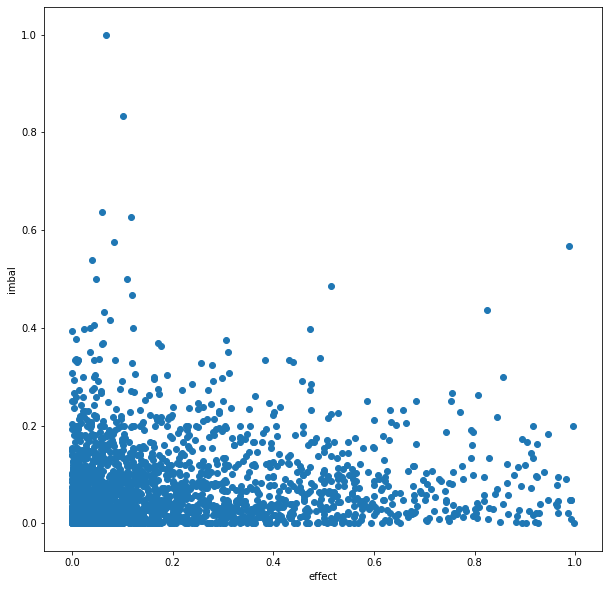

In [186]:
plt.figure(figsize=(10, 10))
plt.scatter(dfj['effect'], dfj['imbal'])
plt.xlabel("effect")
plt.ylabel("imbal")
plt.show()

In [152]:
num_q = 5
dfj['effect_q'] = pd.qcut(dfj['effect'], num_q, labels=False)
dfj['imbal_q'] = pd.qcut(dfj['imbal'], num_q, labels=False)

In [153]:
dfj

,effect,imbal,effect_q,imbal_q
NCT01280266,0.000000,0.011905,0,0
NCT02159898,0.000000,0.066667,0,2
NCT00987623,0.000000,0.005419,0,0
NCT00641797,0.000000,0.393939,0,4
NCT01287221,0.000000,0.140000,0,4
...,...,...,...,...
NCT01340872,0.991189,0.046875,4,2
NCT01352221,0.991189,0.046875,4,2
NCT00433160,0.991886,0.008450,4,0
NCT02732899,0.996303,0.200000,4,4


Thesis: 
- when the true treatment effect is low, then the imbalance effect makes the absolute effect bigger
- when the true treatment effect is high, then the imbalance effect has no impact on treatment effect

In [170]:
low_treatment = dfj[dfj['effect_q'] == 0]
lt_imbal_mean = low_treatment.groupby('imbal_q')['effect'].mean().values

In [171]:
high_treatment = dfj[dfj['effect_q'] == 4]
ht_imbal_mean = high_treatment.groupby('imbal_q')['effect'].mean().values

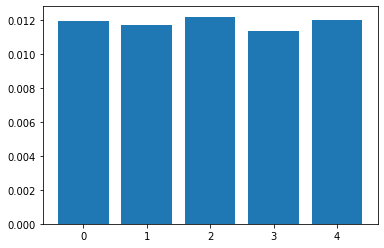

In [178]:
plt.bar(np.arange(5), lt_imbal_mean)
plt.show()